In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
dataset = pd.read_csv("C:\\Users\\5th-NLP-Batch2\\Untitled Folder\\prg5 Datasets\\Breastcancer_data.csv")
X = dataset.iloc[:, -1]
Y = dataset.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1)

import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def initialize_parameters(num_features):
    W = np.random.randn(num_features, 1)
    b = 0
    return W, b

def compute_cost(A, Y):
    m = len(Y)
    cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    return cost

def propagate(W, b, X, Y):
    m = len(Y)

    Z = np.dot(W.T, X) + b
    A = sigmoid(Z)

    cost = compute_cost(A, Y)

    dZ = A - Y
    dW = 1/m * np.dot(X, dZ.T)
    db = 1/m * np.sum(dZ)

    return dW, db, cost

def optimize(W, b, X, Y, alpha, num_iterations):
    for i in range(num_iterations):
        dW, db, cost = propagate(W, b, X, Y)

        W = W - alpha * dW
        b = b - alpha * db

        if i % 100 == 0:
            print(f"Cost after iteration {i}: {cost}")

    return W, b

def predict(W, b, X):
    Z = np.dot(W.T, X) + b
    A = sigmoid(Z)
    return np.round(A)

num_features = 2
m = 1000
X = np.random.randn(num_features, m)
Y = np.random.randint(0, 2, (1, m))

W, b = initialize_parameters(num_features)
alpha = 0.01
num_iterations = 1000

W, b = optimize(W, b, X, Y, alpha, num_iterations)

predictions = predict(W, b, X)

Cost after iteration 0: 793.5035619746122
Cost after iteration 100: 1003.3328089837056
Cost after iteration 200: 1003.3328089837056
Cost after iteration 300: 1003.3328089837056
Cost after iteration 400: 1003.3328089837056
Cost after iteration 500: 1003.3328089837056
Cost after iteration 600: 1003.3328089837056
Cost after iteration 700: 1003.3328089837056
Cost after iteration 800: 1003.3328089837056
Cost after iteration 900: 1003.3328089837056


Validation Set Metrics:
Accuracy: 0.93
Precision: 0.90
Recall: 0.95
F1 Score: 0.92


C:\Users\5th-NLP-Batch2\AppData\Local\Temp\ipykernel_12228\2445087368.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


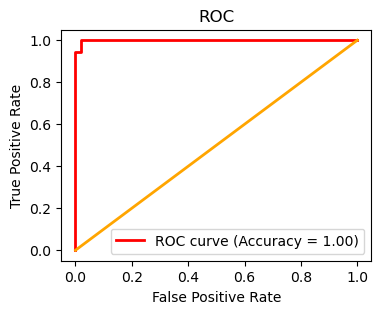

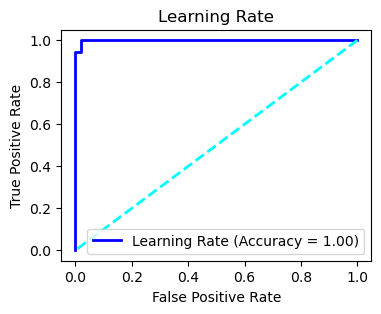

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

class LogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def fit(self, X, y):
        X = self.add_intercept(X)
        self.theta = np.zeros(X.shape[1])

        for _ in range(self.iterations):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.learning_rate * gradient

    def predict_prob(self, X):
        X = self.add_intercept(X)
        return self.sigmoid(np.dot(X, self.theta))

    def predict(self, X, threshold=1):
        return self.predict_prob(X) >= threshold

data = pd.read_csv("C:\\Users\\5th-NLP-Batch2\\Downloads\\Breastcancer_data.csv")
X = data.iloc[:, 2:32].values
X = np.float64(X)
y = data.iloc[:, 1].values
y = np.where(y == 'M', 1, 0)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
val_predictions = model.predict(X_val)
val_predictions_prob = model.predict_prob(X_val)

accuracy = accuracy_score(y_val, val_predictions)
precision = precision_score(y_val, val_predictions)
recall = recall_score(y_val, val_predictions)
f1 = f1_score(y_val, val_predictions)

print("Validation Set Metrics:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (Accuracy = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', lw=2, label='Learning Rate (Accuracy = {:.2f})'.format(roc_auc))
plt.plot([1, 0], [1, 0], color='cyan', lw=2, linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Learning Rate')
plt.legend(loc='lower right')
plt.show()

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

data = pd.read_csv(r"C:\\Users\\5th-NLP-Batch2\\Downloads\\Breastcancer_data.csv")
X = data.iloc[:, 2:32].values
y = data.iloc[:, 1].values
y = np.where(y == 'M', 1, 0)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = LogisticRegression(penalty='l2', random_state=42)

model.fit(X_train, y_train)

val_predictions = model.predict(X_val)

accuracy = accuracy_score(y_val, val_predictions)
precision = precision_score(y_val, val_predictions)
recall = recall_score(y_val, val_predictions)
f1 = f1_score(y_val, val_predictions)

print("Validation Set Metrics:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy: {:.2f} (+/- {:.2f})".format(cv_scores.mean(), cv_scores.std() * 2))


Validation Set Metrics:
Accuracy: 0.96
Precision: 1.00
Recall: 0.92
F1 Score: 0.96
Cross-Validation Accuracy: 0.94 (+/- 0.05)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

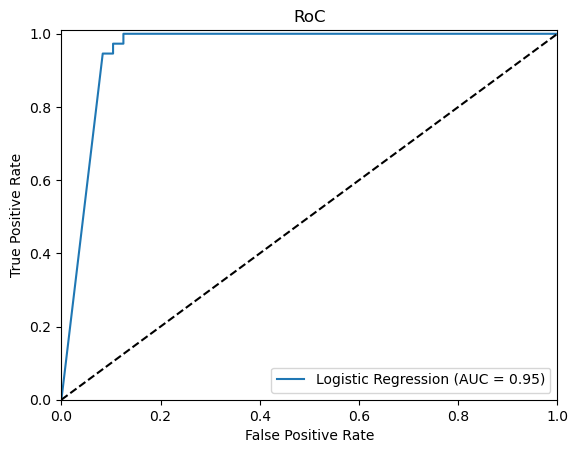

In [4]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_val, val_predictions_prob.ravel())
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RoC')
plt.legend(loc="lower right")
plt.show()

Validation Set Metrics:
Accuracy: 0.96
Precision: 1.00
Recall: 0.92
F1 Score: 0.96
AUC-ROC: 1.00


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


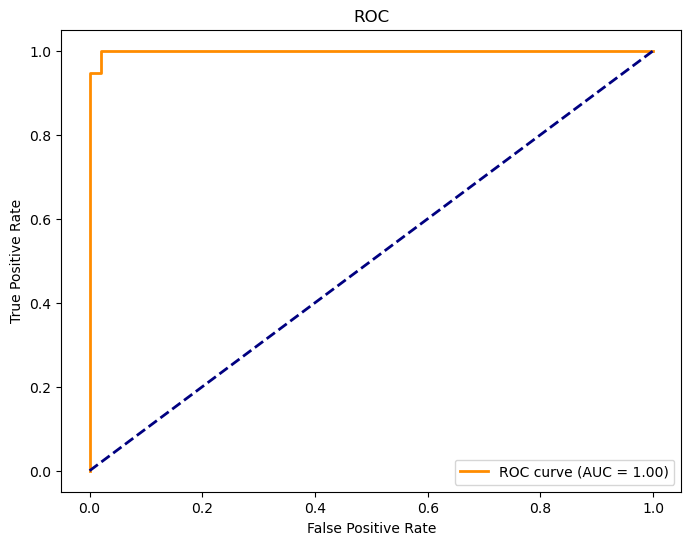

Cross-Validation Accuracy: 0.94 (+/- 0.05)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv(r"C:\\Users\\5th-NLP-Batch2\\Downloads\\Breastcancer_data.csv")
X = data.iloc[:, 2:32].values
y = data.iloc[:, 1].values
y = np.where(y == 'M', 1, 0)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = LogisticRegression(penalty='l2', random_state=42)
model.fit(X_train, y_train)

val_predictions = model.predict(X_val)

accuracy = accuracy_score(y_val, val_predictions)
precision = precision_score(y_val, val_predictions)
recall = recall_score(y_val, val_predictions)
f1 = f1_score(y_val, val_predictions)

y_val_proba = model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
roc_auc = roc_auc_score(y_val, y_val_proba)

print("Validation Set Metrics:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("AUC-ROC: {:.2f}".format(roc_auc))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy: {:.2f} (+/- {:.2f})".format(cv_scores.mean(), cv_scores.std() * 2))
